Yet another 10,000 foot view @ [`https://github.com/squillero/10k`](https://github.com/squillero/10k)  
Copyright **©** 2022 Giovanni Squillero `<squillero@polito.it>`  
Free for personal or classroom use; see the [license](https://github.com/squillero/10k/blob/main/LICENSE.md) for details.  

------------------------------------------------------------

# Neural Networks (part 3)

In [1]:
import numpy as np
from scipy.optimize import minimize
import sympy
import matplotlib.pyplot as plt

In [2]:
sympy.init_printing(forecolor="black")

## Create a not-so-easy dataset

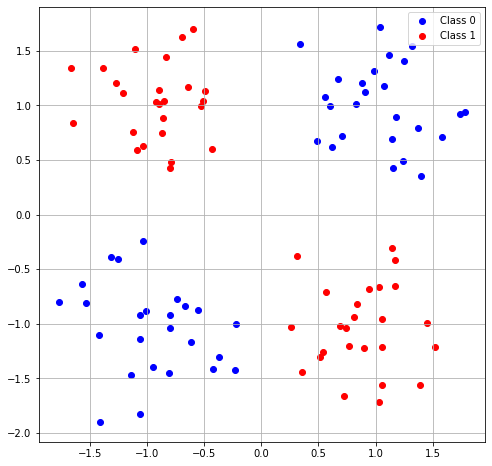

In [3]:
POINTS = 100
SCALE = 0.4
class0 = np.around(
    np.concatenate(
        [
            np.random.normal(loc=1, scale=SCALE, size=(POINTS // 4, 2)) * [-1, -1],
            np.random.normal(loc=1, scale=SCALE, size=(POINTS // 4, 2)) * [1, 1],
        ]
    ),
    decimals=2,
)
class1 = np.around(
    np.concatenate(
        [
            np.random.normal(loc=1, scale=SCALE, size=(POINTS // 4, 2)) * [-1, 1],
            np.random.normal(loc=1, scale=SCALE, size=(POINTS // 4, 2)) * [1, -1],
        ]
    ),
    decimals=2,
)
plt.figure(figsize=(8, 8))
plt.scatter(x=class0[:, 0], y=class0[:, 1], c="blue", label="Class 0")
plt.scatter(x=class1[:, 0], y=class1[:, 1], c="red", label="Class 1")
plt.legend()
plt.grid()
x1_min, x1_max = plt.xlim()
x2_min, x2_max = plt.ylim()

## Activation & Variables

In [4]:
def sigmoid(x):
    return 1 / (1 + sympy.exp(-x))

In [5]:
X1, X2 = sympy.symbols("x_1 x_2")
W = (w for w in sympy.symbols(" ".join([f"w_{t}" for t in range(999)])))

## Neural Network 1

[1/(exp(-w_0 - w_1*x_1 - w_2*x_2) + 1), 1/(exp(-w_3 - w_4*x_1 - w_5*x_2) + 1), 1/(exp(-w_6 - w_7*x_1 - w_8*x_2) + 1)]


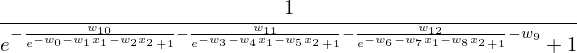

In [6]:
hidden = list()

hidden.append(list())
hidden[0].append(sigmoid(next(W) + X1 * next(W) + X2 * next(W)))
hidden[0].append(sigmoid(next(W) + X1 * next(W) + X2 * next(W)))
hidden[0].append(sigmoid(next(W) + X1 * next(W) + X2 * next(W)))
# hidden[0].append(sigmoid(next(W) + X1 * next(W) + X2 * next(W)))
print(hidden[0])

# hidden.append(list())
# tmp = next(W)
# for p in hidden[0]:
#    tmp += next(W) * p
# hidden[1].append(sigmoid(tmp))
# tmp = next(W)
# for p in hidden[0]:
#    tmp += next(W) * p
# hidden[1].append(sigmoid(tmp))
# print(hidden[1])
# tmp = next(W)
# for p in hidden[0]:
#    tmp += next(W) * p
# hidden[1].append(sigmoid(tmp))
# print(hidden[1])

nn = next(W)
for p in hidden[-1]:
    nn += next(W) * p
nn = sigmoid(nn)
nn

### Define *loss* and optimize parameters

In [7]:
def loss_function(v, e):
    if e == 1:
        return -sympy.log(v)  # nb: log(1) = 0
    else:
        return -sympy.log(1 - v)

In [8]:
loss = 0
for x1, x2 in class0:
    loss = loss + loss_function(nn.subs([(X1, x1), (X2, x2)]), 0)
for x1, x2 in class1:
    loss = loss + loss_function(nn.subs([(X1, x1), (X2, x2)]), 1)
loss = loss / POINTS
symbols = sorted(list(loss.free_symbols), key=str)
print(f"Symbols: {symbols}")
loss_f = sympy.lambdify(symbols, loss)

Symbols: [w_0, w_1, w_10, w_11, w_12, w_2, w_3, w_4, w_5, w_6, w_7, w_8, w_9]


In [9]:
start = np.random.random(len(symbols)) * 2 - 1
fit = minimize(lambda a: loss_f(*a), start, method="BFGS")
print(f"Solution: {fit.x}")

Solution: [ -46.27703928  -76.11371466  -99.15494059  149.60255702 -124.64871232
  -49.34559184   -1.24549433   -1.17435283    1.3767051   -88.98379476
   92.73434483  104.1696462    12.60662548]


### Plot NN with fitted parameters

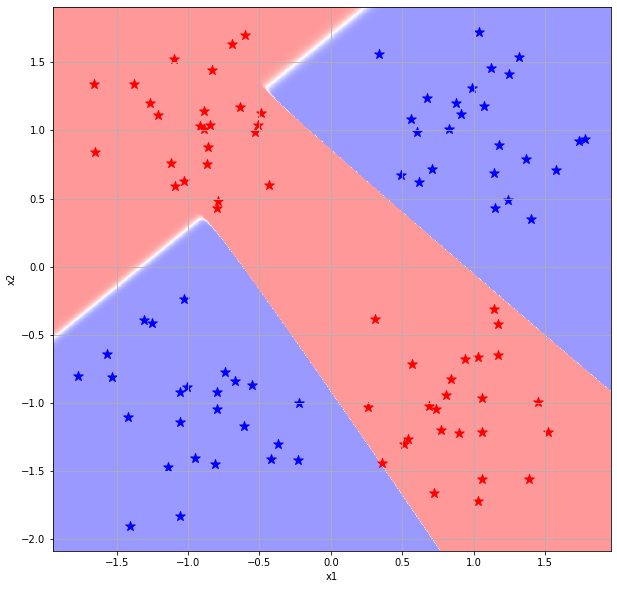

In [10]:
nn_f = sympy.lambdify((X1, X2), nn.subs([(s, v) for s, v in zip(symbols, fit.x)]))

plt.figure(figsize=(10, 10))
x1, x2 = np.meshgrid(np.linspace(x1_min, x1_max, 1_000), np.linspace(x2_min, x2_max, 1_000))
plt.pcolormesh(x1, x2, nn_f(x1, x2), cmap="bwr", alpha=0.4, antialiased=True)
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid()
plt.scatter(x=class0[:, 0], y=class0[:, 1], marker="*", s=100, color="blue", label="Class 0")
plt.scatter(x=class1[:, 0], y=class1[:, 1], marker="*", s=100, color="red", label="Class 1")

## Neural Network 2

Just 1 *simple* perceptron, but with extra inputs 

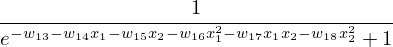

In [11]:
nn = sigmoid(next(W) + next(W) * X1 + next(W) * X2 + next(W) * X1**2 + next(W) * X1 * X2 + next(W) * X2**2)
nn

In [12]:
loss = 0
for x1, x2 in class0:
    loss = loss + loss_function(nn.subs([(X1, x1), (X2, x2)]), 0)
for x1, x2 in class1:
    loss = loss + loss_function(nn.subs([(X1, x1), (X2, x2)]), 1)
loss = loss / POINTS
symbols = sorted(list(loss.free_symbols), key=str)
print(f"Symbols: {symbols}")
loss_f = sympy.lambdify(symbols, loss)

Symbols: [w_13, w_14, w_15, w_16, w_17, w_18]


In [13]:
start = np.random.random(len(symbols)) * 2 - 1
fit = minimize(lambda a: loss_f(*a), start, method="nelder-mead")
print(f"Solution: {fit.x}")

Solution: [ -229.35366984   317.97006521    34.55022393    78.6135891
 -1663.81256633   -91.88150757]


<lambdifygenerated-3>:2: RuntimeWarning: overflow encountered in exp
  return -1/100*log(1 - 1/(exp(-w_13 - 1.78*w_14 - 0.94*w_15 - 3.1684*w_16 - 1.6732*w_17 - 0.8836*w_18) + 1)) - 1/100*log(1 - 1/(exp(-w_13 - 1.74*w_14 - 0.92*w_15 - 3.0276*w_16 - 1.6008*w_17 - 0.8464*w_18) + 1)) - 1/100*log(1 - 1/(exp(-w_13 - 1.58*w_14 - 0.71*w_15 - 2.4964*w_16 - 1.1218*w_17 - 0.5041*w_18) + 1)) - 1/100*log(1 - 1/(exp(-w_13 - 1.4*w_14 - 0.35*w_15 - 1.96*w_16 - 0.49*w_17 - 0.1225*w_18) + 1)) - 1/100*log(1 - 1/(exp(-w_13 - 1.37*w_14 - 0.79*w_15 - 1.8769*w_16 - 1.0823*w_17 - 0.6241*w_18) + 1)) - 1/100*log(1 - 1/(exp(-w_13 - 1.32*w_14 - 1.54*w_15 - 1.7424*w_16 - 2.0328*w_17 - 2.3716*w_18) + 1)) - 1/100*log(1 - 1/(exp(-w_13 - 1.25*w_14 - 1.41*w_15 - 1.5625*w_16 - 1.7625*w_17 - 1.9881*w_18) + 1)) - 1/100*log(1 - 1/(exp(-w_13 - 1.24*w_14 - 0.49*w_15 - 1.5376*w_16 - 0.6076*w_17 - 0.2401*w_18) + 1)) - 1/100*log(1 - 1/(exp(-w_13 - 1.18*w_14 - 0.89*w_15 - 1.3924*w_16 - 1.0502*w_17 - 0.7921*w_18) + 1)) - 1/100*lo

<lambdifygenerated-4>:2: RuntimeWarning: overflow encountered in exp
  return (4.04606835257548e+99*exp(-78.6135891038621*x_1**2 + 1663.81256633285*x_1*x_2 - 317.970065205013*x_1 + 91.881507569986*x_2**2 - 34.5502239261508*x_2) + 1)**(-1.0)
<lambdifygenerated-4>:2: RuntimeWarning: overflow encountered in multiply
  return (4.04606835257548e+99*exp(-78.6135891038621*x_1**2 + 1663.81256633285*x_1*x_2 - 317.970065205013*x_1 + 91.881507569986*x_2**2 - 34.5502239261508*x_2) + 1)**(-1.0)


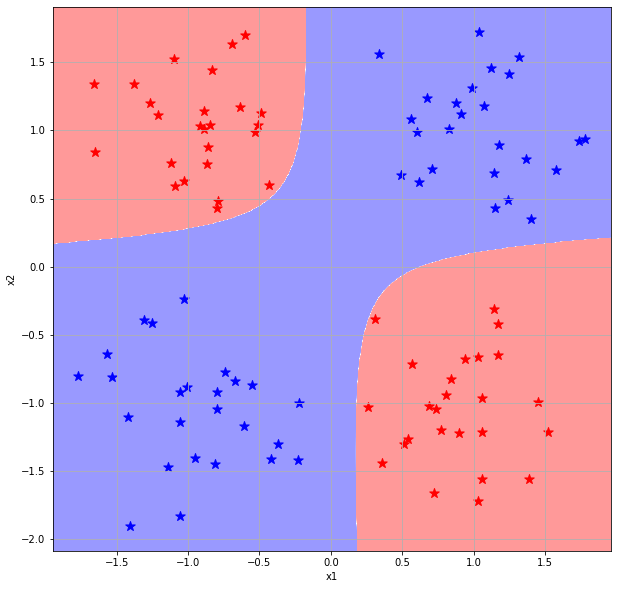

In [14]:
nn_f = sympy.lambdify((X1, X2), nn.subs([(s, v) for s, v in zip(symbols, fit.x)]))

plt.figure(figsize=(10, 10))
x1, x2 = np.meshgrid(np.linspace(x1_min, x1_max, 1_000), np.linspace(x2_min, x2_max, 1_000))
plt.pcolormesh(x1, x2, nn_f(x1, x2), cmap="bwr", alpha=0.4, antialiased=True)
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid()
plt.scatter(x=class0[:, 0], y=class0[:, 1], marker="*", s=100, color="blue", label="Class 0")
plt.scatter(x=class1[:, 0], y=class1[:, 1], marker="*", s=100, color="red", label="Class 1")